In [1]:
import pandas as pd
import glob
from matplotlib import pyplot as plt
import numpy as np

In [4]:
csvs = glob.glob('*.csv')

In [11]:
def to_pd(csv):
    df = pd.read_csv(csv)
    return df

dfs = map(to_pd, csvs)

In [13]:
df = pd.concat(dfs)

In [ ]:
from IPython.display import display, HTML

In [58]:
def fix_name(name):
    return name.split('/')[-1]

def clean(df):
    df = df.drop_duplicates(subset=['Name'])
    df = df.dropna()
    df = df[(df != 0).all(1)]
    df['Name'] = df['Name'].apply(fix_name)
    df = df.sort_values(['Total Percent Correct'], ascending=False)
    df = df.reset_index(drop=True)
    return df

df = clean(df)
df.to_csv('results-complete.csv')

In [82]:
def compute_totals(df):
# Because testing represents 20% of the data
    noise = df['Amount Total Noise'].sum() * 5 
    local = df['Amount Total Local'].sum() * 5 
    return noise, local

noise, local = compute_totals(df)
noise + local

1934720.0

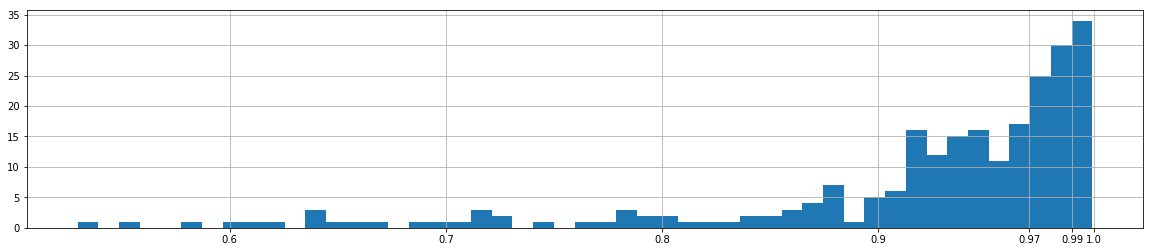

In [151]:
def show_hist(df):
    ax = df['Total Percent Correct'].hist(bins=49, figsize=(20, 4))
    
    labels = np.array([.6, .7, .8, .9, .97, .99, 1])
    
    ax.set_xticks(labels)
    ax.set_xticklabels(labels)
    
    plt.show()
    
show_hist(df)

In [61]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df)


,Name,Amount Correct Noise,Amount Total Noise,Amount Correct Local,Amount Total Local,Total Percent Correct,Epochs
0,33.029999--116.085297,1458.0,1458.0,1101.0,1102.0,0.999609,5.0
1,39.5089--119.836601,1523.0,1524.0,1035.0,1036.0,0.999219,10.0
2,33.260201--116.322304,1506.0,1508.0,1052.0,1052.0,0.999219,5.0
3,19.480289--154.888565,1452.0,1454.0,978.0,978.0,0.999178,5.0
4,20.125248--155.777374,1526.0,1528.0,904.0,904.0,0.999178,5.0
5,AmatriceQuakes,754.0,755.0,397.0,397.0,0.999132,10.0
6,32.891998--116.422302,1491.0,1492.0,938.0,940.0,0.998766,5.0
7,18.468--67.111099,66.0,66.0,701.0,702.0,0.998698,10.0
8,19.372066--155.45723-minmag1,542.0,543.0,992.0,993.0,0.998698,10.0
9,33.599991--117.195427,1463.0,1466.0,1093.0,1094.0,0.998437,10.0
